# Universal embeddings: small test

Finding a universal embedding that resemles the other embeddings the most. 

In [4]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [14]:
W1 = np.array([[1, 0], [0, 1]]).astype(np.float32)
W2 = np.array([[1, 1], [1, -1]]).astype(np.float32)
print(W1)
print(W2)

[[ 1.  0.]
 [ 0.  1.]]
[[ 1.  1.]
 [ 1. -1.]]


Init tensorflow graph

In [18]:
graph = tf.Graph()
with graph.as_default():

  # Input data.
  tf_w1 = tf.constant(W1)
  tf_w2 = tf.constant(W2)
#   transform1 = tf.constant(np.identity(2).astype(np.float32))
  
  # Variables.
  transform1 = tf.Variable(tf.truncated_normal([2, 2]))
  transform2 = tf.Variable(tf.truncated_normal([2, 2]))
#   transform2 = tf.Variable(np.identity(2).astype(np.float32))
#   A = tf.Variable(np.identity(2).astype(np.float32))
  A = tf.Variable(tf.truncated_normal([2, 2]))
  
  # Training computation.
  loss = tf.norm(tf.matmul(tf_w1, transform1) - A) + tf.norm(tf.matmul(tf_w2, transform2) - A) 
  
  # Optimizer.
  # We are going to find the minimum of this loss using gradient descent.
  # 0.5 = learning rate
  optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

Run session

In [19]:
num_steps = 1001

with tf.Session(graph=graph) as session:
  # This is a one-time operation which ensures the parameters get initialized as
  # we described in the graph: random weights for the matrix, zeros for the
  # biases. 
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    # Run the computations. We tell .run() that we want to run the optimizer,
    # and get the loss value and the training predictions returned as numpy
    # arrays.
    _, l, t1, t2, A2 = session.run([optimizer, loss, transform1, transform2, A])
    if (step % 100 == 0):
      print('Loss at step %d: %f' % (step, l))
#       print('Transform 1:')
#       print(t1)
#       print('Transform 2:')
#       print(t2)
#       print('Univerzális embedding:')
#       print(A2)
    
  print('Transform 1:')
  print(t1)
  print('Transform 2:')
  print(t2)
  print('Univerzális embedding:')
  print(A2)
    
print('\n')
print('W1*T1:')
print(np.dot(W1, t1))
print('W2*T2:')
print(np.dot(W2, t2))


Initialized
Loss at step 0: 6.075315
Loss at step 100: 0.858542
Loss at step 200: 0.051475
Loss at step 300: 0.051475
Loss at step 400: 0.051475
Loss at step 500: 0.051475
Loss at step 600: 0.051475
Loss at step 700: 0.051475
Loss at step 800: 0.051475
Loss at step 900: 0.051475
Loss at step 1000: 0.051475
Transform 1:
[[ 0.11459629 -1.10487473]
 [ 0.5817253  -0.74259263]]
Transform 2:
[[ 0.34721434 -0.92482203]
 [-0.23638213 -0.18034799]]
Univerzális embedding:
[[ 0.12026915 -1.1044296 ]
 [ 0.57890528 -0.73975712]]


W1*T1:
[[ 0.11459629 -1.10487473]
 [ 0.5817253  -0.74259263]]
W2*T2:
[[ 0.11083221 -1.10517001]
 [ 0.58359647 -0.74447405]]


Now let's display the results.  


**Blue:** W1 points  
**Gold:** W2 points  
**Orange:** W2 points transformed  
**Green:** universal embedding  

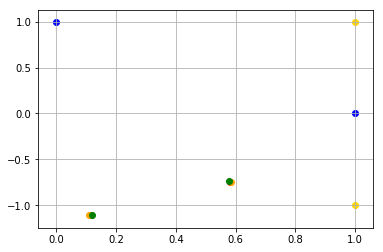

In [21]:
W1_xs = W1[:, 0]
W1_ys = W1[:, 1]
plt.scatter(W1_xs, W1_ys, color='blue')
W2_xs = W2[:, 0]
W2_ys = W2[:, 1]
plt.scatter(W2_xs, W2_ys, color='gold')

W1_t = np.dot(W1, t1)
W1t_xs = W1_t[:, 0]
W1t_ys = W1_t[:, 1]
plt.scatter(W1t_xs, W1t_ys, color='red')
W2_t = np.dot(W2, t2)
W2t_xs = W2_t[:, 0]
W2t_ys = W2_t[:, 1]
plt.scatter(W2t_xs, W2t_ys, color='orange')

U_xs = A2[:, 0]
U_ys = A2[:, 1]
plt.scatter(U_xs, U_ys, color='green')


plt.grid()
plt.show()